# Exploratory Data Analysis for Employee turnover prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('Emp_TurnOver.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.shape

(14999, 10)

In [5]:
# dropping duplicates
df.drop_duplicates(inplace=True)
df.shape

(11991, 10)

In [6]:
# Checking null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
# Renaming columns
df.rename(columns={'sales':'Department'},inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<AxesSubplot:xlabel='left', ylabel='count'>

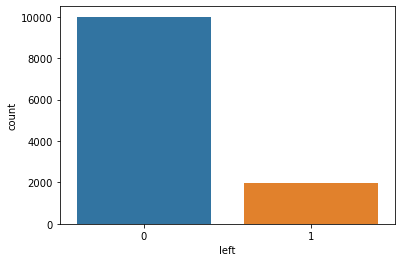

In [8]:
sns.countplot(df['left'])

<AxesSubplot:xlabel='number_project', ylabel='count'>

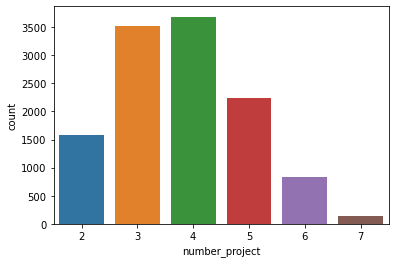

In [9]:
sns.countplot(df['number_project'])

<AxesSubplot:xlabel='number_project', ylabel='count'>

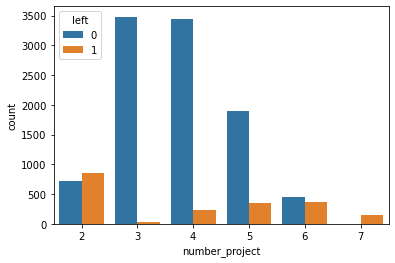

In [10]:
sns.countplot(df['number_project'],hue=df['left'])

<AxesSubplot:xlabel='salary', ylabel='count'>

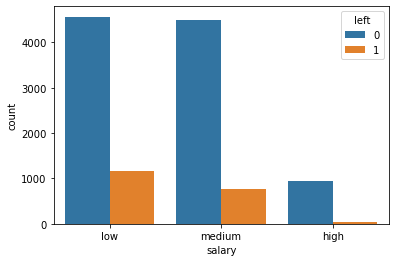

In [11]:
sns.countplot(df['salary'],hue=df['left'])

In [12]:
# correlation among the features
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


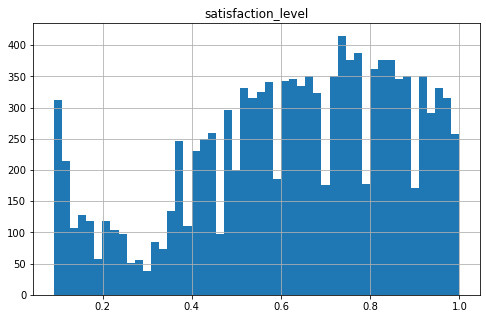

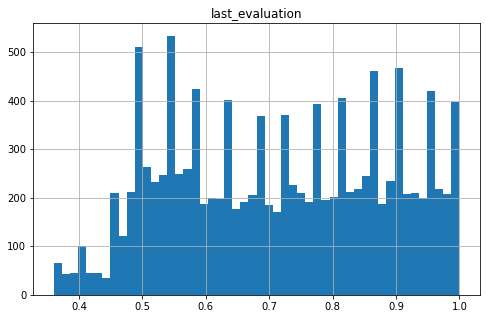

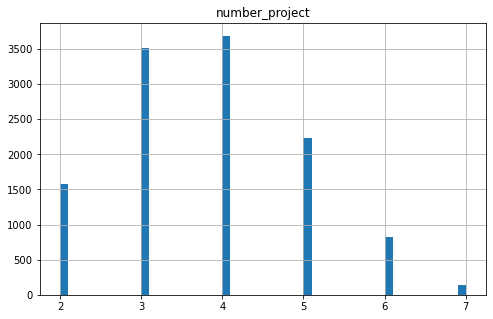

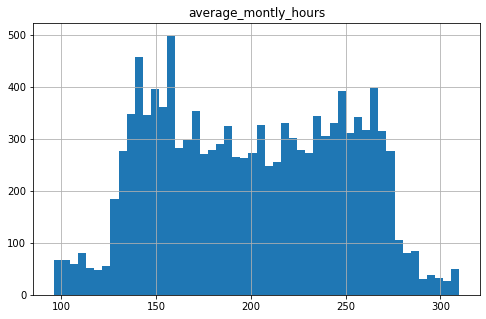

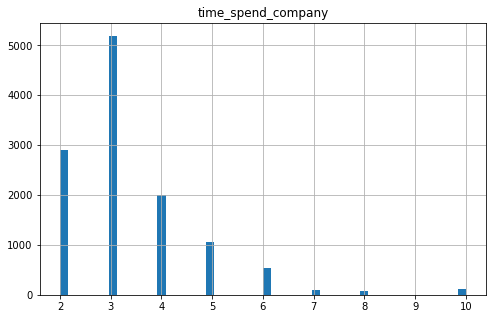

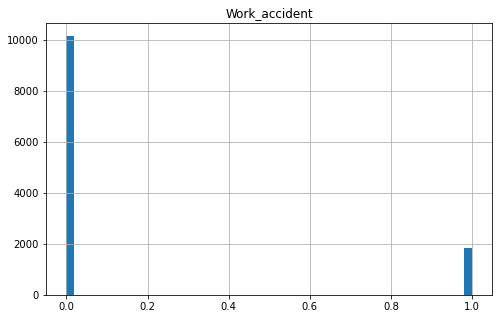

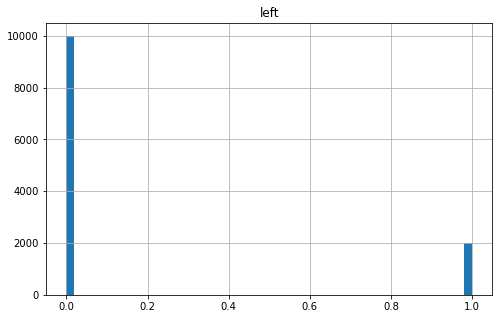

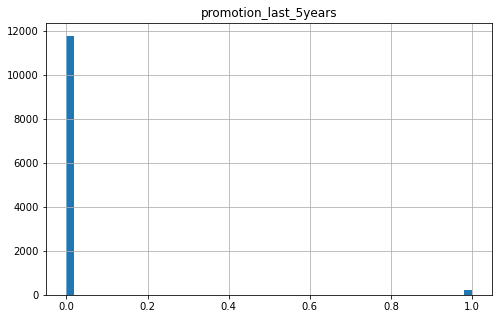

In [13]:
# Histogram analysis
cols=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident',
     'left','promotion_last_5years']
for i in cols:
    plt.figure(figsize=(8,5))
    df[i].hist(bins=50)
    plt.title(i)
    plt.show()

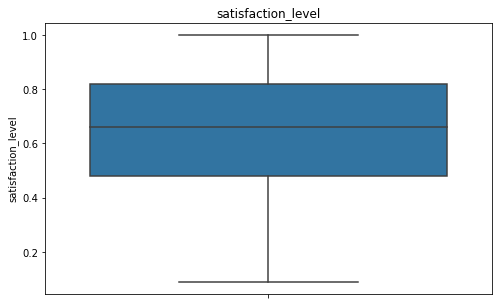

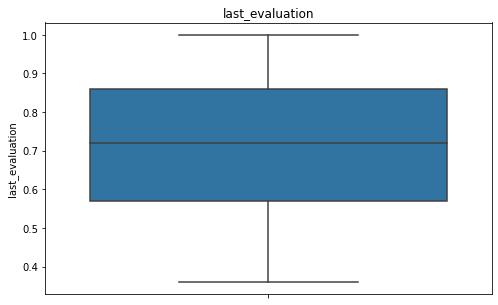

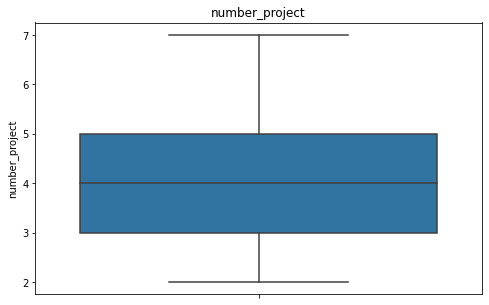

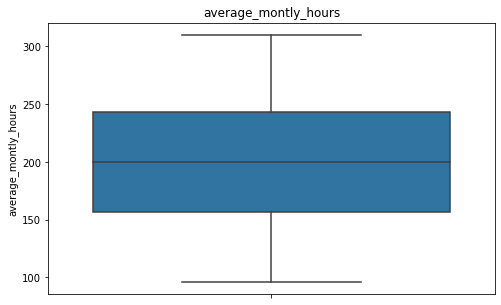

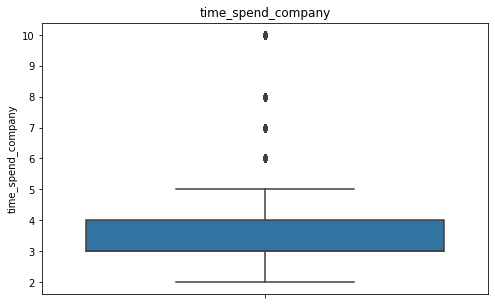

In [14]:
# Box plot analysis
cols=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']
for i in cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(y=df[i])
    plt.title(i)
    plt.show()

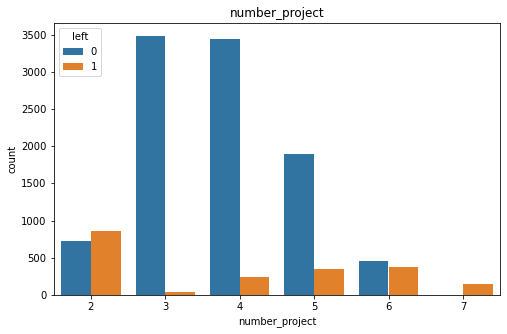

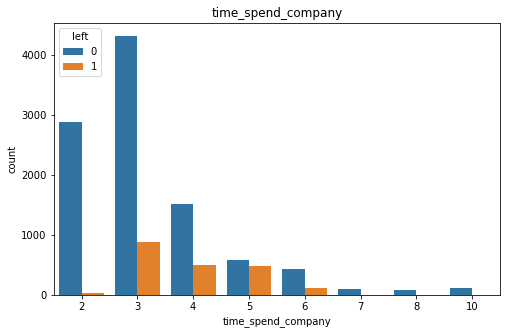

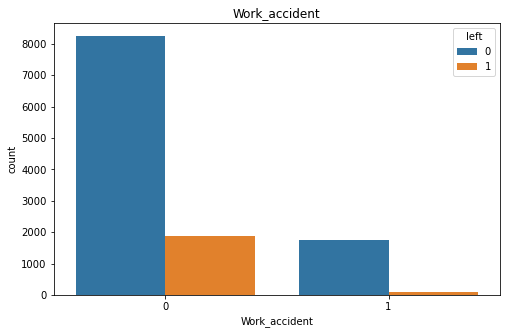

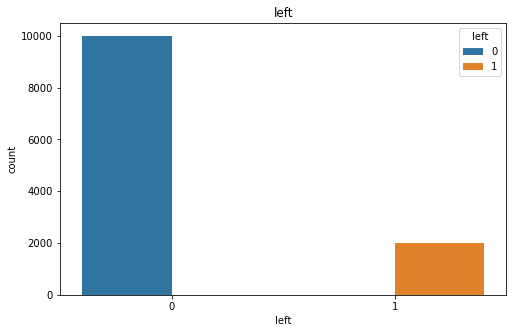

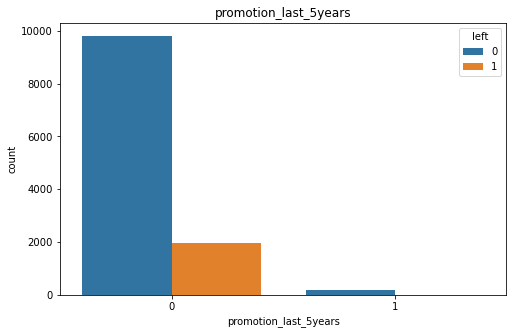

In [15]:
cols=['number_project','time_spend_company','Work_accident','left','promotion_last_5years']
for i in cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=df[i],hue=df['left'])
    plt.title(i)
    plt.show()

In [16]:
# Unique values in each features
cols=df.columns
for i in cols:
    print(i ,':')
    print(df[i].unique())
    print('Total :',len(df[i].unique()))
    print('\n')

satisfaction_level :
[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
Total : 92


last_evaluation :
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
Total : 65


number_project :
[2 5 7 6 4 3]
Total : 6


average_montly_hours :
[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 2

In [17]:
# Most repeated values in each feature
cols=df.columns
for i in cols:
    print(i ,':',df[i].mode()[0])

satisfaction_level : 0.74
last_evaluation : 0.55
number_project : 4
average_montly_hours : 149
time_spend_company : 3
Work_accident : 0
left : 0
promotion_last_5years : 0
Department : sales
salary : low
